In [19]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##Загрузка данных

In [40]:
# Присвоим переменной «url» ссылку на датасет:

url = '/content/drive/MyDrive/Data_Analysis/Killers_withou_headers.csv'

# создаем лист с названием столбцов:

cols = [
    'Имя',
    'Год рождения',
    'Религия',
    'Национальность',
    'Пол',
    'Работа',
    'тюремное заключение',
    'дефект речи',
    'травма головы',
    'Воровал',
    'Был подвержен изнасилованию',
    'родители наркоманы',
    'злоупотребление наркотиками \ алкоголем',
    'Проблемы в школе',
    'Жил с детьми',
    'физический дефект',
    'посешал психолога',
    'Были попытки самоубийства',
    'посещал судебно-медицинскую клинику',
    'Маньяк'
    ]
# используем Pandas read_csv():

dataset = pd.read_csv(url, names = cols)

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Анализ данных

In [42]:
# размер датасета, 185 записей, 20 столбцов

dataset.shape

(185, 20)

In [44]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,Имя,Год рождения,Религия,Национальность,Пол,Работа,тюремное заключение,дефект речи,травма головы,Воровал,Был подвержен изнасилованию,родители наркоманы,злоупотребление наркотиками \ алкоголем,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Маньяк
0,John Joubert,1963,Атеист,Америка,М,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1.0
1,Harvey Glatman,1927,Атеист,Америка,М,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1.0
2,John Wayne Gacy,1942,Католицизм,Америка,М,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1.0
3,Ted Bundy,1946,Атеист,Америка,М,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1.0
4,Joseph Kallinger,1935,Атеист,Америка,М,0,1,0,1,1,1,0,0,0,1,1,1,0,1,1.0
5,Velma Barfield,1932,Христианство,Америка,Ж,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1.0
6,John Straffen,1930,Атеист,Европа,М,0,1,0,1,0,0,0,0,1,0,1,1,0,1,1.0
7,Anna Marie Hahn,1906,Атеист,Европа,Ж,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1.0
8,Edward Edwards,1933,Атеист,Америка,М,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1.0
9,Aileen Carol Wuornos,1956,Христианство,Америка,Ж,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1.0


In [45]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [46]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Имя                                      185 non-null    object 
 1   Год рождения                             185 non-null    int64  
 2   Религия                                  185 non-null    object 
 3   Национальность                           185 non-null    object 
 4   Пол                                      185 non-null    object 
 5   Работа                                   185 non-null    int64  
 6   тюремное заключение                      185 non-null    int64  
 7   дефект речи                              185 non-null    int64  
 8   травма головы                            185 non-null    int64  
 9   Воровал                                  185 non-null    int64  
 10  Был подвержен изнасилованию              185 non-n

In [47]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:
dataset.describe()

,Год рождения,Работа,тюремное заключение,дефект речи,травма головы,Воровал,Был подвержен изнасилованию,родители наркоманы,злоупотребление наркотиками \ алкоголем,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Маньяк
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1908.718919,0.362162,0.459459,0.086486,0.210811,0.216216,0.372973,0.189189,0.540541,0.816216,0.172973,0.291892,0.254054,0.081081,0.135135,0.467568
std,78.578035,0.481930,0.499706,0.281844,0.408991,0.412781,0.484907,0.392722,0.499706,0.388359,0.379250,0.455867,0.436509,0.273700,0.342796,0.468029
min,1452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1935.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1956.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
dataset['Маньяк'].unique()

array([1. , 0. , 0.5])

In [53]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['Маньяк'].value_counts()

,count
Маньяк,
0.0,87
1.0,75
0.5,23


# Визуализация данных

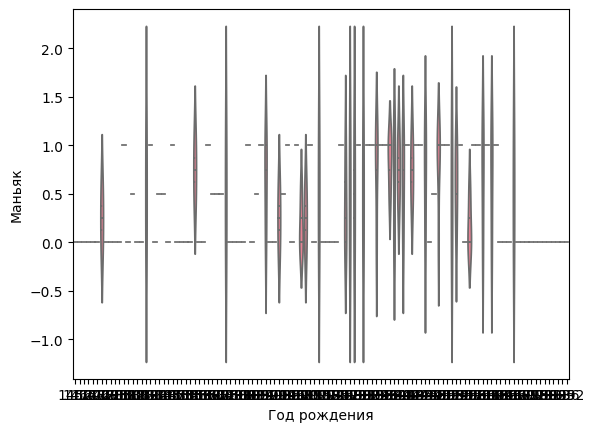

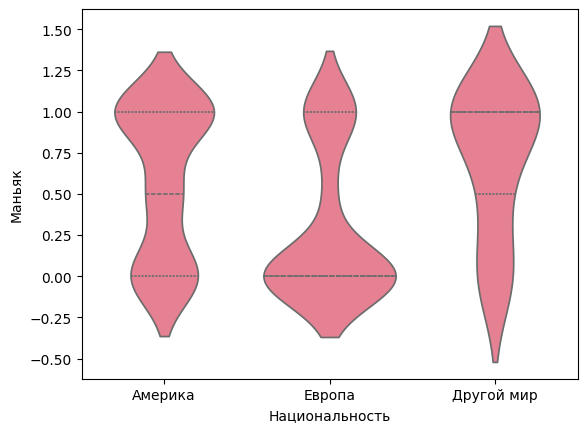

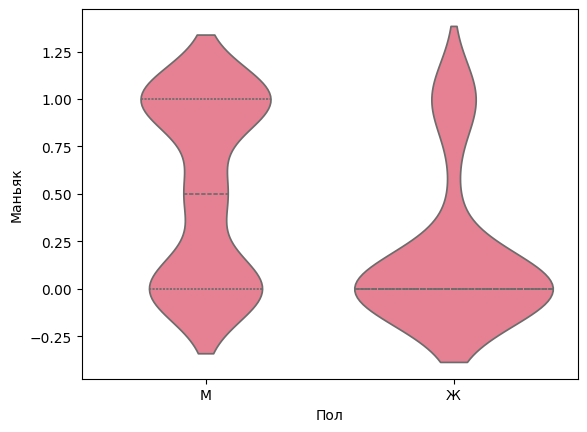

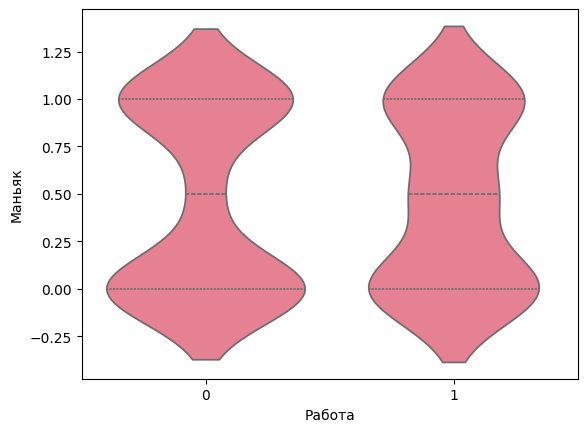

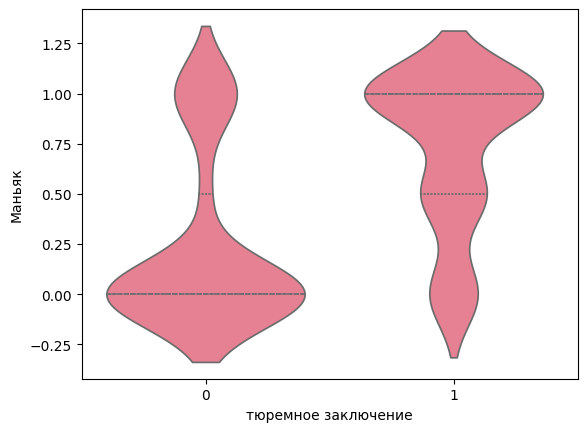

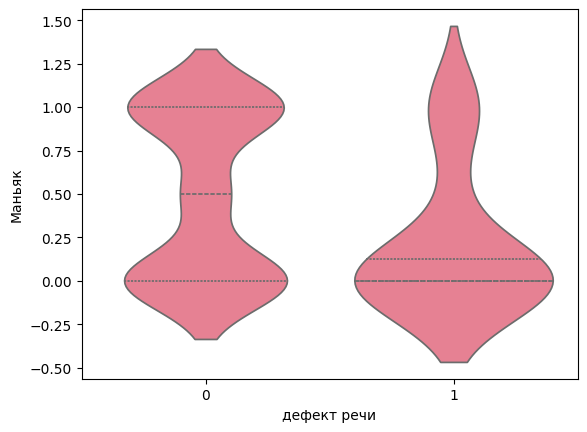

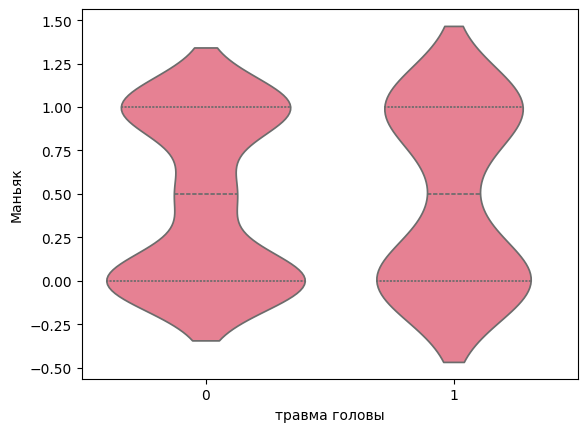

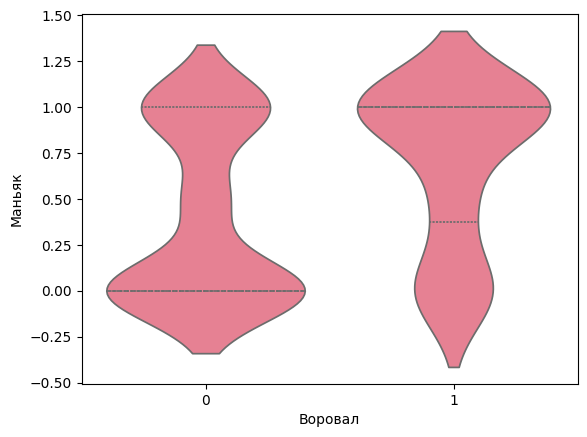

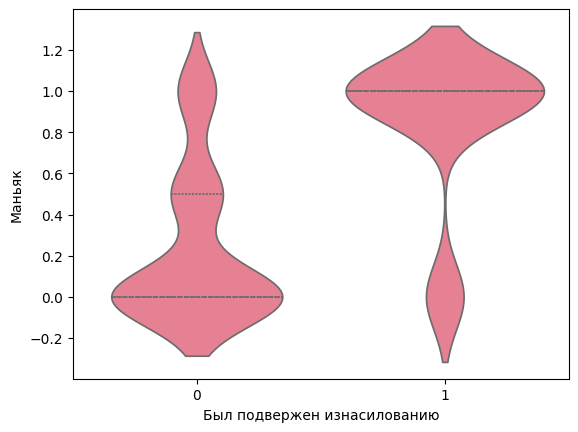

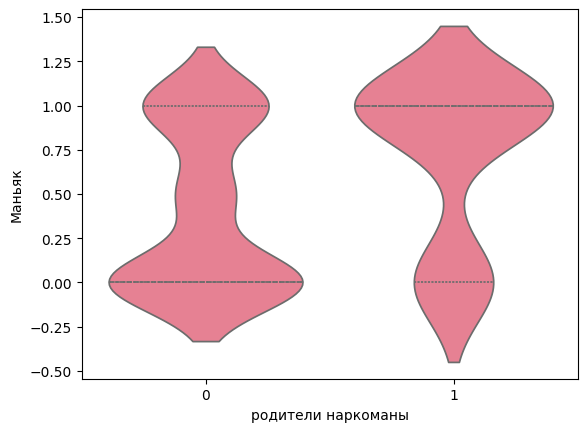

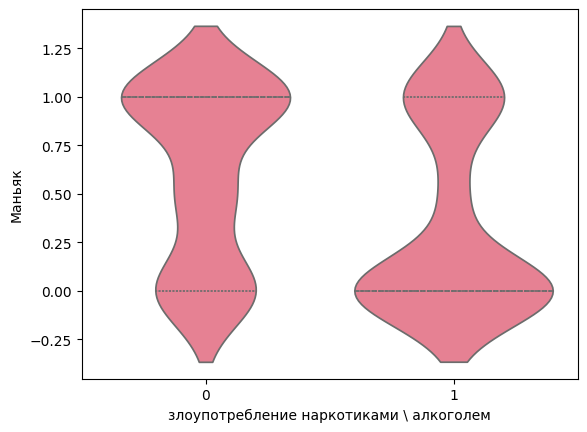

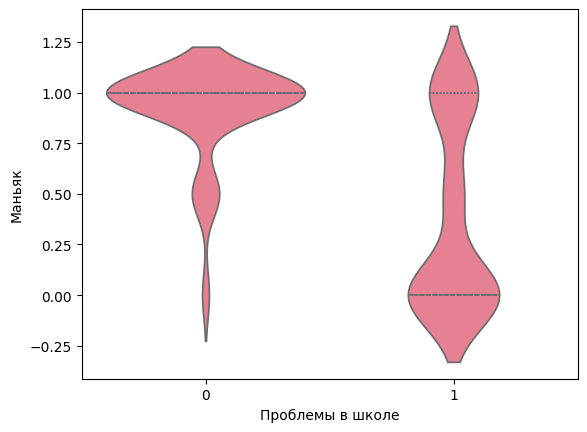

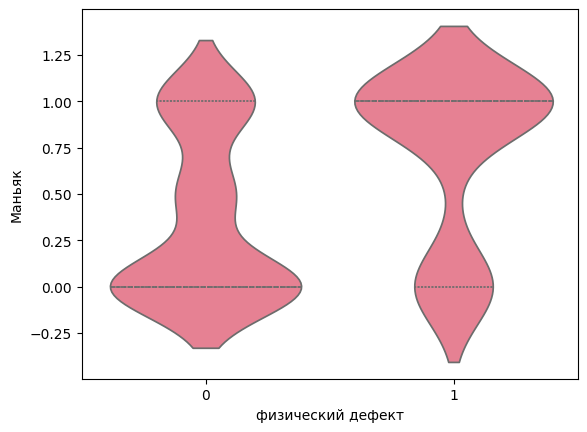

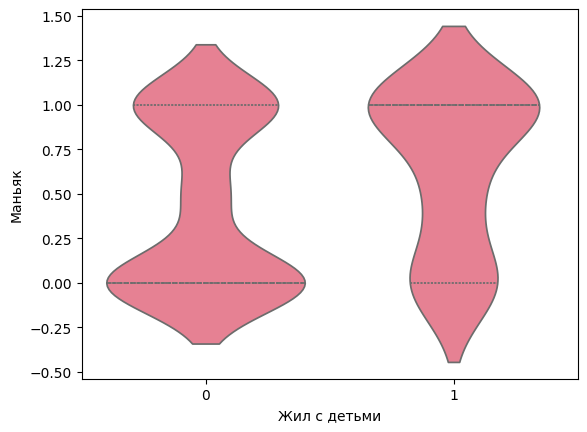

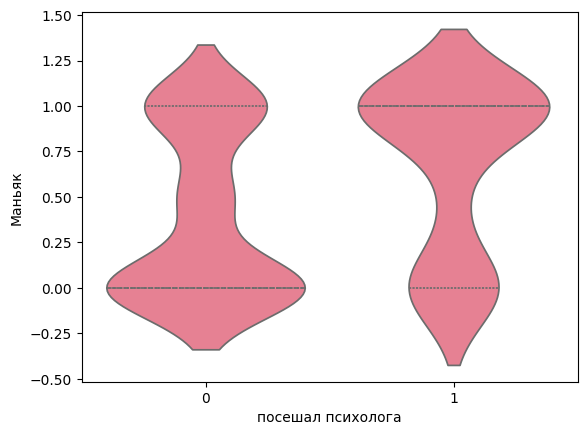

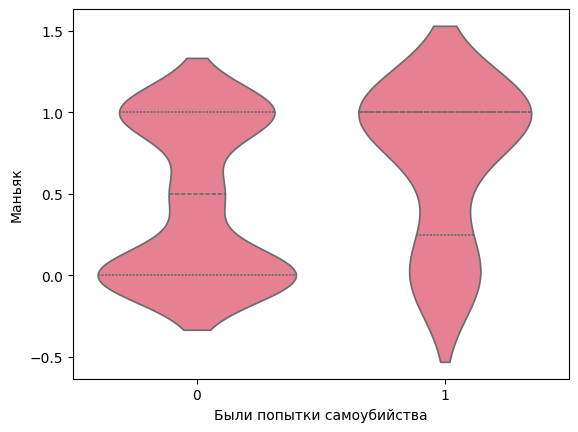

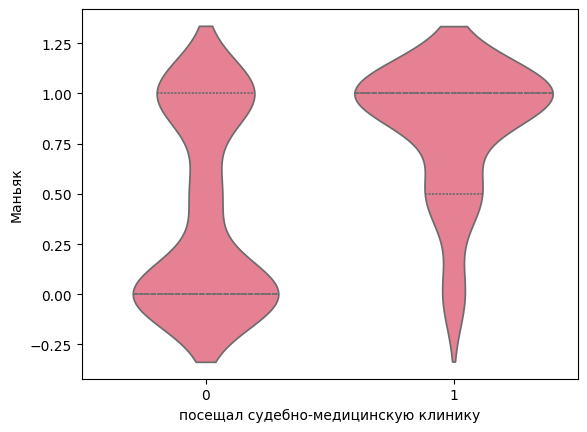

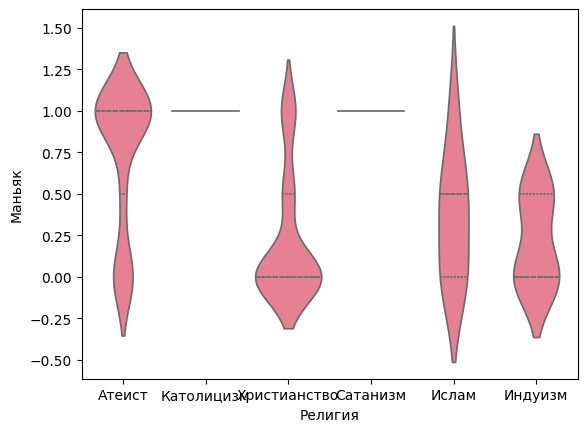

In [51]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Маньяк', x='Год рождения', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Национальность', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Пол', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Работа', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='тюремное заключение', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='дефект речи', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='травма головы', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Воровал', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Был подвержен изнасилованию', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='родители наркоманы', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='злоупотребление наркотиками \ алкоголем', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Проблемы в школе', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='физический дефект', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Жил с детьми', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='посешал психолога', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Были попытки самоубийства', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='посещал судебно-медицинскую клинику', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Маньяк', x='Религия', data=dataset, inner='quartile')
plt.show()

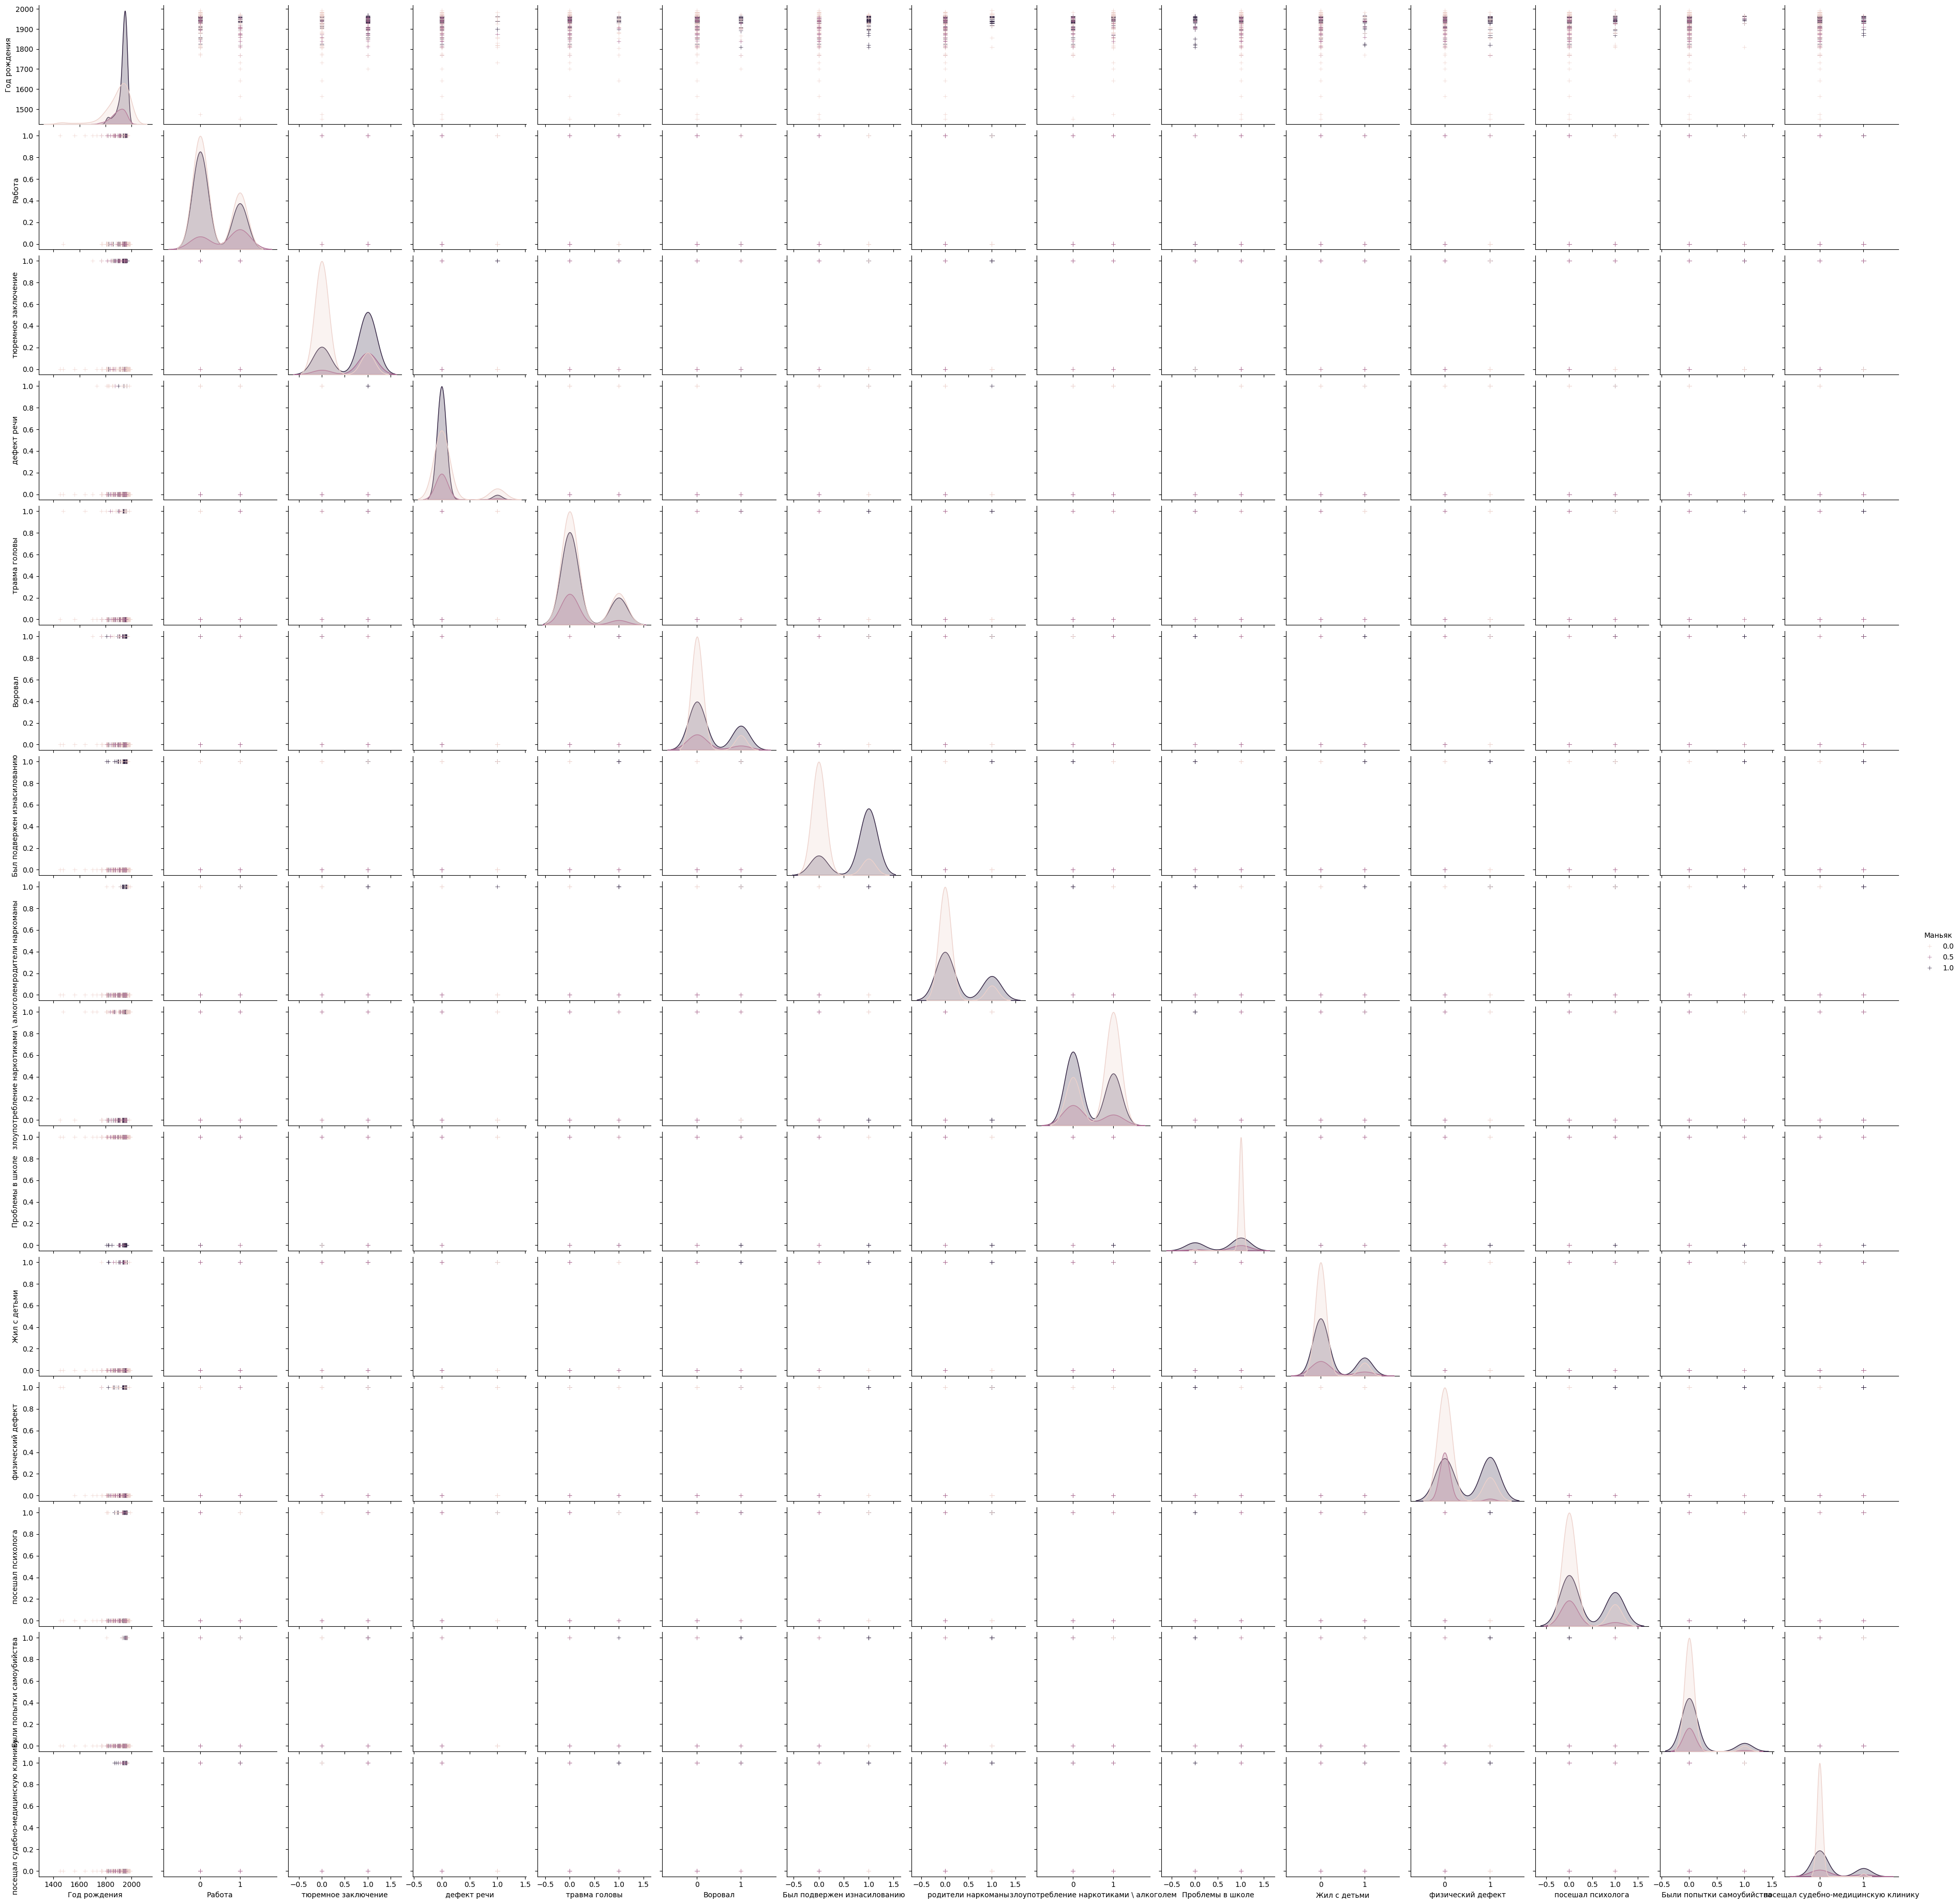

In [54]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='Маньяк', markers='+')
plt.show()

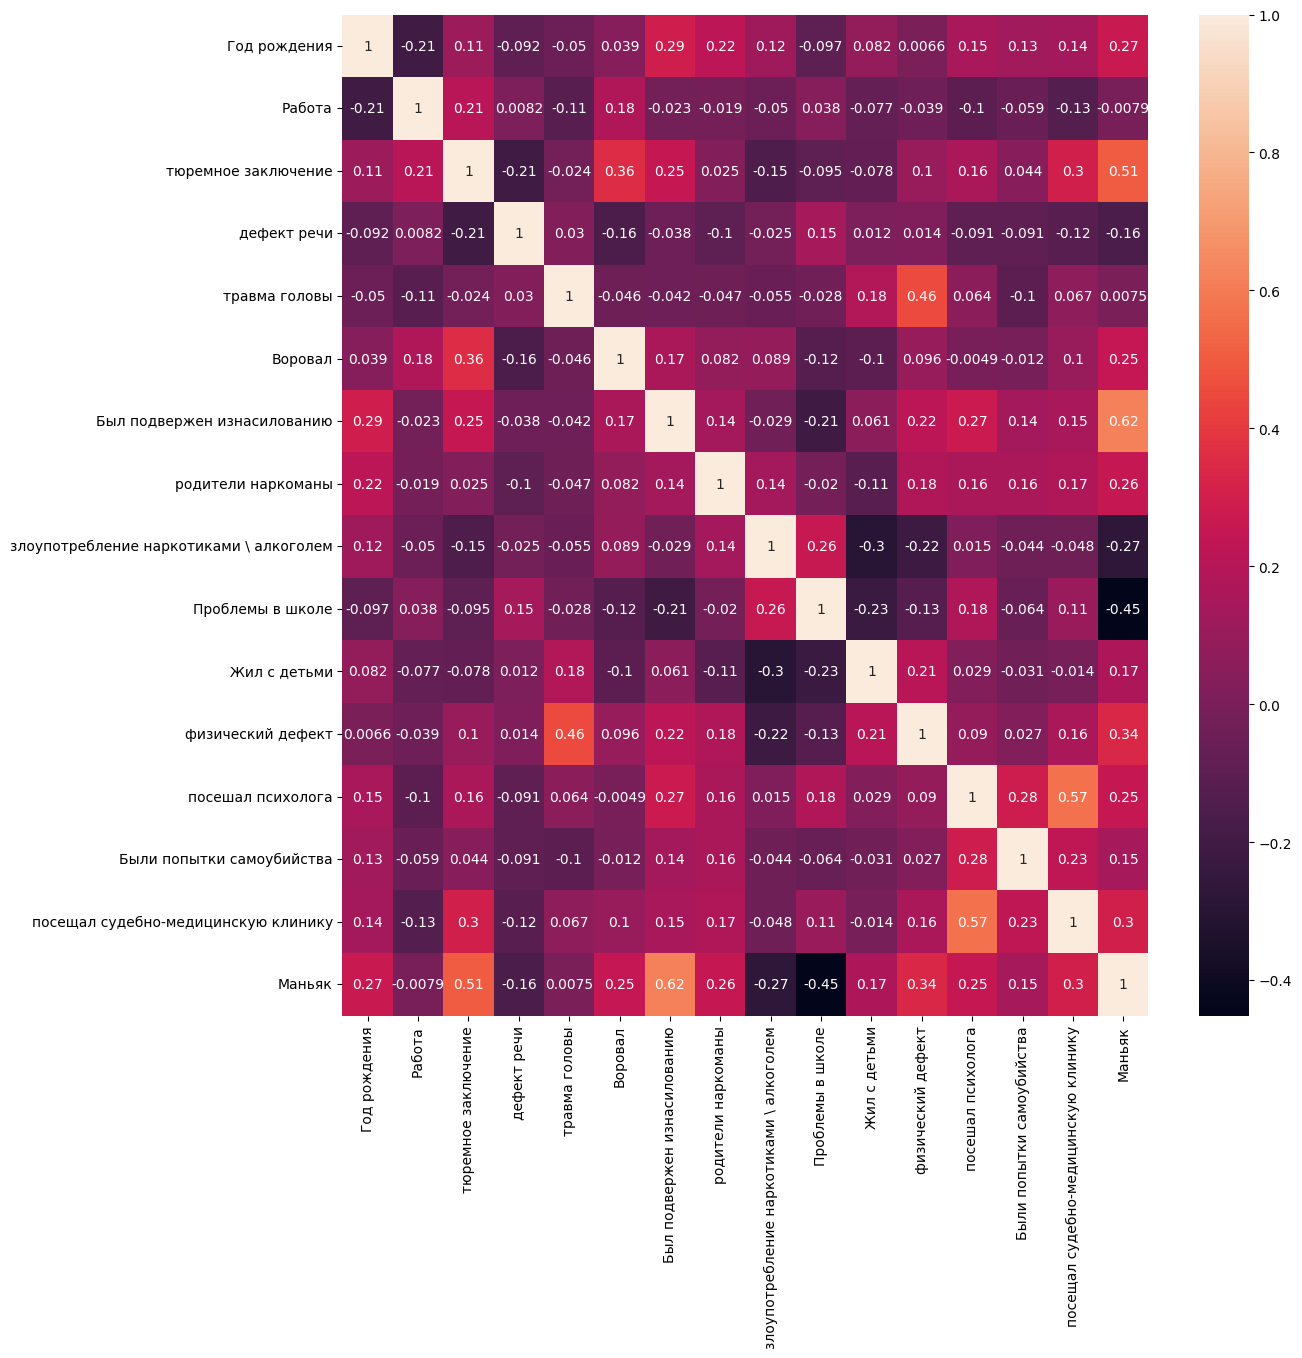

In [58]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(13,13))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Маньяк.

В X складываем весь набор данных без целевой переменной.


In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

X = dataset.drop(['Маньяк'], axis=1)
X = dataset.drop(['Имя'], axis=1)

enc_ = OrdinalEncoder()

X[['Религия', 'Национальность', 'Год рождения', 'Пол']] = enc_.fit_transform(X[['Религия', 'Национальность', 'Год рождения', 'Пол']])

y = dataset['Маньяк']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (185, 19) | y shape: (185,) 


X имеет 185 строк и 19 столбца, тогда как Y имеет 185 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [87]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [88]:
import scipy.stats as stats

y_mapped = y.map({0: 0, 0.5: 1, 1.0: 2})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=6.270433097392003, pvalue=2.5236564257383224e-09, df=183.0)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.07833129719788945, pvalue=0.9376501055772986, df=183.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [90]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.932857 (0.042188)
LDA: 0.796667 (0.092534)
KNN: 0.643333 (0.074458)
CART: 1.000000 (0.000000)
NB: 0.973333 (0.044222)
SVC: 0.690476 (0.077166)


Наивный Байесовский классификатор показали лучшие метрики среди всех алгоритмов.
Далее работаем с Наивный Байесовский классификатор.


## Обучение конкретной модели
Определяем нашу модель NB
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [93]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Предсказание классов
gaussian_nb_pred_res = gaussian_nb.predict(X_test)

# Получение вероятностей классов
sk_proba = gaussian_nb.predict_proba(X_train)

# Оценка точности
gaussian_nb_accuracy = accuracy_score(y_test, gaussian_nb_pred_res)

# Вывод результатов
print(f'sk NB accuracy: {gaussian_nb_accuracy}')
print(f'sk NB prediction: {gaussian_nb_pred_res}')
print('sk class probabilities (first 5 examples):', sk_proba[:5], sep='\n')

sk NB accuracy: 0.972972972972973
sk NB prediction: [0 1 1 0 2 2 0 0 0 2 0 1 0 2 2 0 2 0 2 0 1 0 2 2 0 2 0 2 2 0 0 0 2 2 0 0 2]
sk class probabilities (first 5 examples):
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Визуализация решения

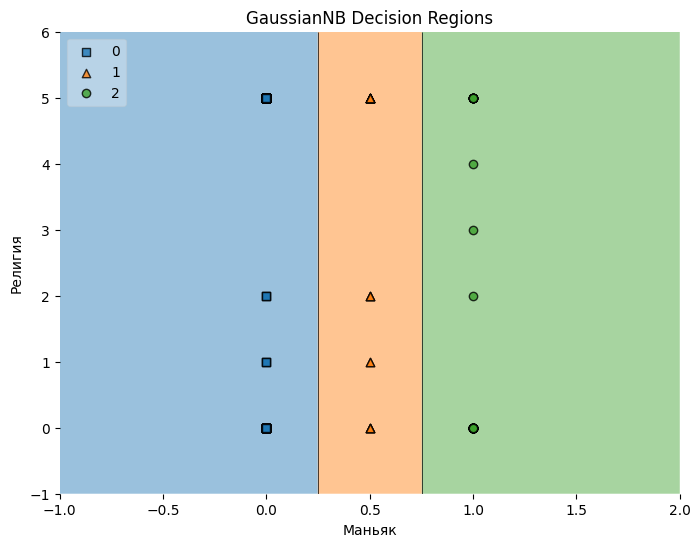

In [99]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Используем только два признака для визуализации
X_2d = X_train[['Маньяк', 'Религия']].values
y_2d = y_train.values

# Обучение модели GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_2d, y_2d)

# Построение области решений
plt.figure(figsize=(8, 6))
plt.title('GaussianNB Decision Regions')
plot_decision_regions(X=X_2d, y=y_2d, clf=gaussian_nb, legend=2)

# Добавление подписи осей
plt.xlabel('Маньяк')
plt.ylabel('Религия')
plt.show()

sk GaussianNB accuracy: 1.0
sk GaussianNB prediction: [2 0 1 0 2 2 0 2 2 0 0 1 0 2 0 0 2 2 0 2 2 0 1 2 0 1 0 2 0 2 0 0 1 0 2 2 0
 0 2 0 1 2 0 2 2 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


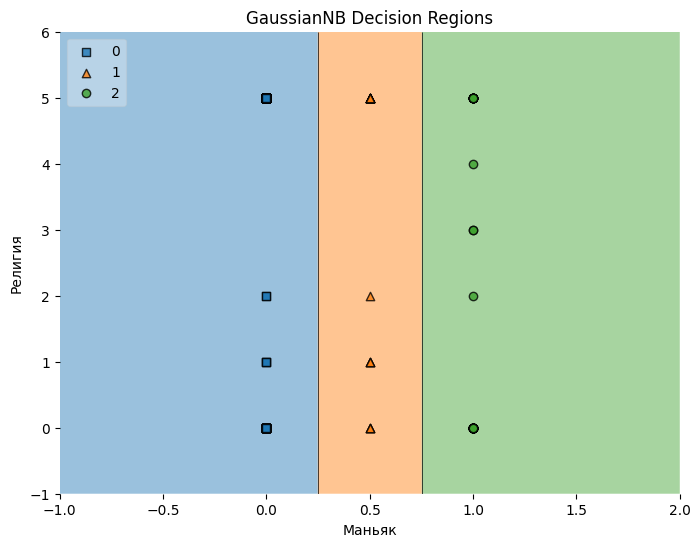

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Подготовка данных
df = dataset["Маньяк"].map({0: 0, 0.5: 1, 1.0: 2})
Xs = dataset[['Маньяк', 'Религия']]
ys = df.values

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)

# Обучение модели Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Прогнозирование
gaussian_nb_pred_res = gaussian_nb.predict(X_test)

# Точность модели
gaussian_nb_accuracy = accuracy_score(y_test, gaussian_nb_pred_res)

print(f'sk GaussianNB accuracy: {gaussian_nb_accuracy}')
print(f'sk GaussianNB prediction: {gaussian_nb_pred_res}')

# Визуализация решения
plt.figure(figsize=(8, 6))
plt.title('GaussianNB Decision Regions')
plot_decision_regions(X=X_train.values, y=y_train, clf=gaussian_nb, legend=2)

# Добавление подписи осей
plt.xlabel('Маньяк')
plt.ylabel('Религия')
plt.show()

In [106]:
from sklearn import metrics

# Метрики для тестового набора данных
gaussian_nb_pred_res = gaussian_nb.predict(X_test)

# Оценка точности
accuracy = metrics.accuracy_score(y_test, gaussian_nb_pred_res)
print(f'Accuracy: {accuracy:.2f}')

# Оценка полноты и точности
recall = metrics.recall_score(y_test, gaussian_nb_pred_res, average="weighted")
precision = metrics.precision_score(y_test, gaussian_nb_pred_res, average="weighted")

print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))

# Подробный отчет
print("Classification Report:")
print(metrics.classification_report(y_test, gaussian_nb_pred_res, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy: 1.00
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        20

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



Результаты показывают, что модель Gaussian Naive Bayes работает идеально на тестовом наборе данных, с точностью 100%.
1. Accuracy: 1.00
- Точность (accuracy) = 1.00 означает, что модель правильно предсказала все объекты из тестового набора данных.
- Точность — это доля правильно классифицированных примеров из общего числа. Все 47 примеров были классифицированы правильно.
2. Recall (all 1s predicted right): 1.0
 - Полнота (recall) = 1.0 для всех классов говорит о том, что модель правильно предсказала все объекты для каждого класса.
 - Полнота измеряет, насколько хорошо модель находит все объекты каждого класса в тестовом наборе данных.
 - В данном случае Recall = 1.0 для каждого класса, что означает, что модель не пропустила ни одного объекта каждого класса.
3. Precision (confidence when predicting a 1): 1.0
 - Точность (precision) = 1.0 для всех классов говорит о том, что модель, когда предсказывает класс, уверена, что это действительно так.
 - Точность измеряет, насколько правильно модель классифицирует объекты каждого класса.
 - Значение Precision = 1.0 означает, что все предсказанные объекты для каждого класса действительно принадлежат этому классу.
4. Classification Report:
 - Precision, Recall и F1-score для каждого класса показывают следующее:
 - Для каждого из классов (0, 1, 2) модель имеет precision, recall и f1-score равные 1.00. Это означает, что модель идеально предсказала все примеры для каждого класса, не совершив ни одной ошибки.
 - Support (поддержка) — это количество примеров в тестовом наборе для каждого класса.
 - Класс 0: 20 примеров
 - Класс 1: 7 примеров
 - Класс 2: 20 примеров
 - (macro avg) — среднее значение по всем классам, не взвешенное по количеству примеров в каждом классе. Поскольку все значения равны 1.00, то macro avg тоже 1.00.
 - (weighted avg) — усреднение с учетом веса классов (т.е. с учетом количества примеров в каждом классе). Поскольку все показатели для классов одинаковы (1.00), то weighted avg также равно 1.00.


Итог:


Результаты показывают, что модель Gaussian Naive Bayes работает безошибочно на этом тестовом наборе данных

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

url = '/content/drive/MyDrive/Data_Analysis/Killers_withou_headers.csv'
cols = [
    'Имя',
    'Год рождения',
    'Религия',
    'Национальность',
    'Пол',
    'Работа',
    'тюремное заключение',
    'дефект речи',
    'травма головы',
    'Воровал',
    'Был подвержен изнасилованию',
    'родители наркоманы',
    'злоупотребление наркотиками \ алкоголем',
    'Проблемы в школе',
    'Жил с детьми',
    'физический дефект',
    'посешал психолога',
    'Были попытки самоубийства',
    'посещал судебно-медицинскую клинику',
    'Маньяк'
    ]

dataset = pd.read_csv(url, names = cols)

enc_ = OrdinalEncoder()

dataset[['Религия', 'Национальность', 'Пол']] = enc_.fit_transform(dataset[['Религия', 'Национальность', 'Пол']])

dataset = dataset.drop('Имя', axis=1)
dataset = dataset.drop('Год рождения', axis=1)

# Разделение на признаки и целевую переменную
X = dataset.drop('Маньяк', axis=1)
y = dataset['Маньяк'].map({0: 0, 0.5: 1, 1.0: 2})

In [160]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.819780 (0.071926)
LDA: 0.812637 (0.078225)
KNN: 0.711538 (0.103473)
CART: 0.782967 (0.062899)
NB: 0.608791 (0.128454)
SVC: 0.826374 (0.064649)


In [167]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Обучение модели Gaussian Naive Bayes
model = LinearDiscriminantAnalysis(solver='eigen')
model.fit(X_train, y_train)

# Прогнозирование и точность модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

# Пример нового пользователя
new_data = pd.DataFrame({
    'Религия': ['Атеист'],
    'Национальность': ['Европа'],
    'Пол': ['Ж'],
    'Работа': [1],
    'тюремное заключение': [0],
    'дефект речи': [0],
    'травма головы': [0],
    'Воровал': [0],
    'Был подвержен изнасилованию': [0],
    'родители наркоманы': [0],
    'злоупотребление наркотиками \ алкоголем': [0],
    'Проблемы в школе': [0],
    'Жил с детьми': [0],
    'физический дефект': [0],
    'посешал психолога': [1],
    'Были попытки самоубийства': [0],
    'посещал судебно-медицинскую клинику': [0]
})

# Преобразование категориальных признаков нового пользователя
new_data[['Религия', 'Национальность', 'Пол']] = enc.transform(new_data[['Религия', 'Национальность', 'Пол']])

# Предсказание для нового пользователя
prediction = model.predict(new_data)
print(f'Предсказанный результат для нового пользователя: {prediction[0]}')

Точность модели: 0.8297872340425532
Предсказанный результат для нового пользователя: 2
